In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [22]:
# https://www.python-course.eu/neural_network_mnist.php
with open('MNIST/mnist_train.csv','r') as f:
    lines = f.readlines()
train_labels = torch.tensor([int(a.split(',')[0]) for a in lines]).long()
train_images = torch.tensor([list(map(int,a.split(',')[1:])) for a in lines]).float()

with open('MNIST/mnist_test.csv','r') as f:
    lines = f.readlines()
test_labels = torch.tensor([int(a.split(',')[0]) for a in lines]).long()
test_images = torch.tensor([list(map(int,a.split(',')[1:])) for a in lines]).float()

In [23]:
print(len(train_labels),len(train_images),len(train_images[0]))
print(len(test_labels),len(test_images),len(test_images[0]))

60000 60000 784
10000 10000 784


tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

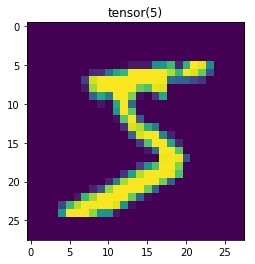

In [24]:
print(train_images[0])
plt.imshow(train_images[0].reshape(28,28))
plt.title(str(train_labels[0]))
plt.show()

In [25]:
torch.tensor((train_images.numpy()+.01)/255.0)

tensor([[3.9216e-05, 3.9216e-05, 3.9216e-05,  ..., 3.9216e-05, 3.9216e-05,
         3.9216e-05],
        [3.9216e-05, 3.9216e-05, 3.9216e-05,  ..., 3.9216e-05, 3.9216e-05,
         3.9216e-05],
        [3.9216e-05, 3.9216e-05, 3.9216e-05,  ..., 3.9216e-05, 3.9216e-05,
         3.9216e-05],
        ...,
        [3.9216e-05, 3.9216e-05, 3.9216e-05,  ..., 3.9216e-05, 3.9216e-05,
         3.9216e-05],
        [3.9216e-05, 3.9216e-05, 3.9216e-05,  ..., 3.9216e-05, 3.9216e-05,
         3.9216e-05],
        [3.9216e-05, 3.9216e-05, 3.9216e-05,  ..., 3.9216e-05, 3.9216e-05,
         3.9216e-05]])

In [26]:
train_images = torch.tensor((train_images.numpy()+.01)/255.0)
test_images = torch.tensor((test_images.numpy()+.01)/255.0)

tensor([3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05,
        3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05,
        3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05,
        3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05,
        3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05,
        3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05,
        3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05,
        3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05,
        3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05,
        3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05,
        3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05,
        3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05, 3.9216e-05,
        3.9216e-05, 3.9216e-05, 3.9216e-

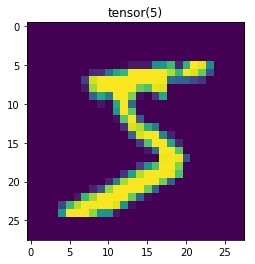

In [27]:
print(train_images[0])
plt.imshow(train_images[0].reshape(28,28))
plt.title(str(train_labels[0]))
plt.show()

In [28]:
import torch
from torch.utils import data

class Dataset(data.Dataset):
    'Characterizes a dataset for PyTorch'
    def __init__(self, samples, labels):
        'Initialization'
        self.labels = labels
        self.samples = samples

    def __len__(self):
        'Denotes the total number of samples'
        return len(self.samples)

    def __getitem__(self, index):
        'Generates one sample of data'

        # Load data and get label
        X = self.samples[index]
        y = self.labels[index]

        return X, y

In [29]:
print(torch.backends.cudnn.version())

7402


In [30]:
# https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel

# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
print(use_cuda)
device = torch.device("cuda:0" if use_cuda else "cpu")
#cudnn.benchmark = True

# Parameters
params = {'batch_size': 64,
          'shuffle': True,
          'num_workers': 6}
max_epochs = 100

# Generators
trainset = Dataset(train_images,train_labels)
trainloader = data.DataLoader(trainset, **params)

testset = Dataset(test_images, test_labels)
testloader = data.DataLoader(testset, **params)

classes = [str(a) for a in range(10)]
print(classes)

True
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [31]:
# MNIST dataset 
batch_size = 64
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [32]:
for i, (images, labels) in enumerate(train_loader):
    print('Pytorch')
    y = images.reshape(-1, 28*28)
    print(len(y),len(y[0]),y[0][0])
    print(type(y),type(y[0]))
    print(y.type(),y[0].type())
    #print(labels,type(labels))
    break
for i, (images, labels) in enumerate(trainloader):
    print('Mine')
    print(len(images),len(images[0]),images[0][0])
    print(type(images),type(images[0]))
    print(images.type(),images[0].type())
    #print(labels,type(labels))
    break
for i, (images, labels) in enumerate(trainloader):
    images = images.float()
    print('Mine')
    print(len(images),len(images[0]),images[0][0])
    print(type(images),type(images[0]))
    print(images.type(),images[0].type())
    #print(labels,type(labels))
    break

Pytorch
64 784 tensor(0.)
<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.FloatTensor torch.FloatTensor
Mine
64 784 tensor(3.9216e-05)
<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.FloatTensor torch.FloatTensor
Mine
64 784 tensor(3.9216e-05)
<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.FloatTensor torch.FloatTensor


In [33]:
for i, (images, labels) in enumerate(train_loader):
    print('Pytorch')
    print(len(labels),labels[0])
    print(labels.type(),labels[0].type())
    break
for i, (images, labels) in enumerate(trainloader):
    print('Mine')
    print(len(labels),labels[0])
    print(labels.type(),labels[0].type())
    break

Pytorch
64 tensor(3)
torch.LongTensor torch.LongTensor
Mine
64 tensor(0)
torch.LongTensor torch.LongTensor


In [34]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [35]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [36]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

In [37]:
# Train the model
total_step = len(trainloader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(trainloader):  
        # Move tensors to the configured device
        #images = images.reshape(-1, 28*28).to(device)
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))


Epoch [1/5], Step [100/938], Loss: 0.4004
Epoch [1/5], Step [200/938], Loss: 0.3981
Epoch [1/5], Step [300/938], Loss: 0.2537
Epoch [1/5], Step [400/938], Loss: 0.1740
Epoch [1/5], Step [500/938], Loss: 0.2221
Epoch [1/5], Step [600/938], Loss: 0.2284
Epoch [1/5], Step [700/938], Loss: 0.2539
Epoch [1/5], Step [800/938], Loss: 0.1104
Epoch [1/5], Step [900/938], Loss: 0.1664
Epoch [2/5], Step [100/938], Loss: 0.0989
Epoch [2/5], Step [200/938], Loss: 0.0289
Epoch [2/5], Step [300/938], Loss: 0.1771
Epoch [2/5], Step [400/938], Loss: 0.0537
Epoch [2/5], Step [500/938], Loss: 0.0347
Epoch [2/5], Step [600/938], Loss: 0.0634
Epoch [2/5], Step [700/938], Loss: 0.0600
Epoch [2/5], Step [800/938], Loss: 0.0961
Epoch [2/5], Step [900/938], Loss: 0.0311
Epoch [3/5], Step [100/938], Loss: 0.0745
Epoch [3/5], Step [200/938], Loss: 0.0285
Epoch [3/5], Step [300/938], Loss: 0.0274
Epoch [3/5], Step [400/938], Loss: 0.0307
Epoch [3/5], Step [500/938], Loss: 0.0132
Epoch [3/5], Step [600/938], Loss: